### Multi-class Classification for Arabic data set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

### EDA


In [2]:
df = pd.read_csv('../data/arabic_dataset_classifiction.csv')
df.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [3]:
df = df.rename(columns = {'targe':'target'})


In [4]:
df.shape

(111728, 2)

In [5]:
# let's take a look at the text that belongs to each column
df[df['target']==0].head()

,text,target
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


> looks like label 0 is for Entertainment news


In [6]:
df[df['target']==1].head()

,text,target
13738,سرقة محل للمجوهرات ببني ملالاعتدى لصوص على حار...,1
13739,اضطرت عناصر الشرطة القضائية بالرشيدية السبت ال...,1
13740,تمكنت عناصر المركز الترابي للدرك الملكي بالدرو...,1
13741,استقبل قسم المستعجلات بالمستشفى المحلي لمدينة ...,1
13742,مهاجرون كاميرونيون قتلوا حارس قيسارية وقاصر ذب...,1


> Label 1 is for Crime news

In [7]:
df[df['target']==2].head()

,text,target
30466,وقعت شركة أليانس هوسبيتاليتي ”، فرع الاستثمار ...,2
30467,كشفت مجموعة فورد سيارتها الجديدة بي ماكس في ال...,2
30468,أفاد مكتب الصرف تراجع قيمة صادرات الفوسفاط ومش...,2
30469,حازت أخيرا مجموعة بي إم ترمينال »، التي تدير ا...,2
30470,طرحت الخطوط الملكية المغربية أخيرا مجموعة من ا...,2


> And label 2 is for Business news

In [8]:
df[df['target']==3].head()

,text,target
44701,استنفرت التصريحات التي خرج بها رئيس الحكومة عب...,3
44702,دخل فريق العدالة والتنمية في مجلس النواب على ا...,3
44703,أقر رئيس الحكومة عبد الإله بنكيران بأن طريقة ص...,3
44704,حط طائرة الملك محمد السادس اليوم الأحد بنيودله...,3
44705,أكد الأمين العام لحزب الاستقلال حميد شباط على ...,3


> Politics news

In [9]:
df[df['target']==4].head()

,text,target
65206,حقق فريق تشيلسي فوزا ثمينا على مانشستر سيتي في...,4
65207,لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي ...,4
65208,كشفت صحيفة دير شبيغل الألمانية الجمعة أن فوز ا...,4
65209,كشفت تقارير إخبارية أن البرازيلي نيمار نصح زمي...,4
65210,في ما يلي البرنامج الكامل لنهائيات كأس اوروبا ...,4


> Sport News

In [10]:
# Let's add add a target names colums


In [11]:
mapping = {0:'Entertainment',1:'Crime',2:'Business',3:'Politics',4:'Sport'}

In [12]:
df['target_name'] = df['target'].map(mapping)
df.head()

,text,target,target_name
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,Entertainment
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,Entertainment
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,Entertainment
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,Entertainment
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,Entertainment


In [13]:
# Let's look at the class frequency

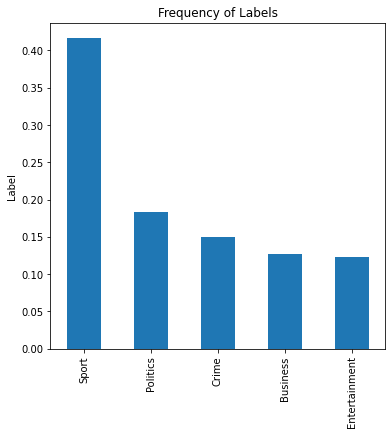

In [14]:
df['target_name'].value_counts(normalize=True).plot.bar(
    figsize = (6,6),ylabel = 'Label',title = 'Frequency of Labels');

> We have class imbalance. We will keep this in mind when we do the modeling part

### Modeling and Evaluation 


In [15]:
# dropping na

In [16]:
df[['text']].isnull().sum(axis = 0)


text    2939
dtype: int64

In [17]:
df = df.dropna()

In [18]:
# let's create our X and y
x=df.iloc[:,0]
y=df.iloc[:,2]
# splitting the data into train and test set
X_trainVal, X_test, y_trainVal, y_test = train_test_split(x, y, test_size = 0.20, random_state = 202, stratify=y)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size = 0.20, random_state = 202, stratify=y_trainVal)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [21]:
params = {'alpha':[0.0001,0.001]}
model = Pipeline([('vect', TfidfVectorizer()),
                   ('clf', GridSearchCV(SGDClassifier(random_state=2022), params, cv=5))])
model.fit(X_train.dropna(),y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GridSearchCV(cv=5, estimator=SGDClassifier(random_state=2022),
                              param_grid={'alpha': [0.0001, 0.001]}))])

In [22]:
y_pred_train = model.predict(X_train)
y_pred_val= model.predict(X_val)
print('Classification report for train data')
print(classification_report(y_train,y_pred_train,zero_division = 0)) 
print('Classification report for validation data')
print(classification_report(y_val,y_pred_val,zero_division = 0))

Classification report for train data
               precision    recall  f1-score   support

     Business       0.93      0.92      0.93      9066
        Crime       0.96      0.98      0.97     10705
Entertainment       0.98      0.96      0.97      8791
     Politics       0.93      0.93      0.93     13110
        Sport       0.99      0.99      0.99     27952

     accuracy                           0.97     69624
    macro avg       0.96      0.96      0.96     69624
 weighted avg       0.97      0.97      0.97     69624

Classification report for validation data
               precision    recall  f1-score   support

     Business       0.92      0.90      0.91      2266
        Crime       0.95      0.97      0.96      2677
Entertainment       0.96      0.96      0.96      2198
     Politics       0.92      0.91      0.91      3278
        Sport       0.99      0.99      0.99      6988

     accuracy                           0.96     17407
    macro avg       0.95      0.95  

In [23]:
y_test_predict= model.predict(X_test)

In [26]:
# now lets see the pefermance on the test data
print(classification_report(y_test,y_test_predict,zero_division = 0))

               precision    recall  f1-score   support

     Business       0.91      0.89      0.90      2833
        Crime       0.96      0.97      0.96      3346
Entertainment       0.96      0.95      0.95      2747
     Politics       0.90      0.91      0.91      4097
        Sport       0.99      0.99      0.99      8735

     accuracy                           0.96     21758
    macro avg       0.95      0.94      0.94     21758
 weighted avg       0.96      0.96      0.96     21758



In [34]:
#Let's combine the train and validation:
params = {'alpha':[0.0001,0.001]}
model = Pipeline([('vect', TfidfVectorizer()),
                   ('clf', GridSearchCV(SGDClassifier(random_state=2022), params, cv=5))])
model.fit(X_trainVal.dropna(),y_trainVal)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GridSearchCV(cv=5, estimator=SGDClassifier(random_state=2022),
                              param_grid={'alpha': [0.0001, 0.001]}))])

### Saving the Model

In [36]:
import pickle
filename= "../sgd_model.pkl"
with open(filename, 'wb') as fout:
    pickle.dump(model,fout)